# K-Nearest Neighbor Model Implementation

### STEPS:

#### INITIAL MODEL
-------------

1. Load train data (have to split this dataset as training and testing)
2. Assess the requirement for normalization
3. Normalize the data IF required
4. Split train / test datasets
5. Fit the model for K = 1 (write it in an iterable way)
6. Predict test data --> build confusion matrix --> calculate accuracy / calculate missclassification error

#### FEATURE ITERATION
-----------------

1. Write a function to get all possible feature combinations into a 2D list
2. Parameterize INITIAL MODEL to take a set of features and predict
3. Provide an output of the results (for each K value which gives the lowest Missclassification Error)

#### FINAL MODEL EVALUATION
----------------------

1. Write a function to take feature combinations in iteratively and run the model
2. Save the output of each iteration into a list to be taken for evaluation

#### IMPORTS

In [36]:
import numpy as np
import pandas as pd
import sklearn.neighbors as skl_nb
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

from utils.loading_data  import load_to_df_from_csv

#### STEP 1: LOADING DATA

In [22]:
data = load_to_df_from_csv("../data/train.csv") # Loading the train.csv as the main dataset

# Column Transformation to lowercase and underscored spaces
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('-','_')
data.columns = data.columns.str.lower()

### Exploring data

In [19]:
data.shape

(1039, 14)

In [23]:
data.describe()

,number_words_female,total_words,number_of_words_lead,difference_in_words_lead_and_co_lead,number_of_male_actors,year,number_of_female_actors,number_words_male,gross,mean_age_male,mean_age_female,age_lead,age_co_lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


### STEP 2 / 3: NORMALIZATION - To be done after the initial model implementation

### STEP 4: SPLIT TRAIN / TEST DATASETS

In [32]:
np.random.seed(1)
trainI = np.random.choice(data.shape[0], size = 727, replace = False)
trainIndex = data.index.isin(trainI)

train = data.iloc[trainIndex]
test = data.iloc[~trainIndex]

X_train = train.iloc[:, 0:train.shape[1] - 1]
X_test = test.iloc[:, 0:test.shape[1] - 1]
Y_train = train.iloc[:, -1]
Y_test = test.iloc[:, -1]

### STEP 5: FIT K-NN MODEL TO DATA

In [48]:
model = skl_nb.KNeighborsClassifier(n_neighbors = 8)
model.fit(X_train, Y_train) # Fit the model to data

KNeighborsClassifier(n_neighbors=8)

### STEP 6: PREDICT TEST DATA

In [49]:
prediction = model.predict(X_test)
print('Confusion matrix:\n')
print(pd.crosstab(prediction, Y_test), '\n')
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")

Confusion matrix:

lead    Female  Male
row_0               
Female      22     6
Male        61   223 

Accuracy: 0.785


### FINDING BEST K

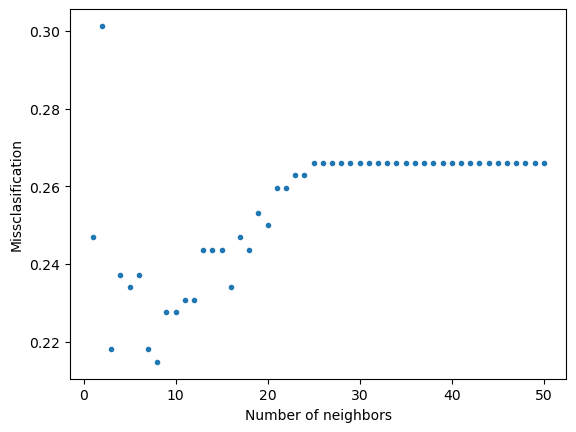

In [52]:
misclassification = []
for k in range(50): # Try n_neighbors = 1, 2, ...., 50
    model = skl_nb.KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    misclassification.append(np.mean(prediction != Y_test))
K = np.linspace(1, 50, 50)
plt.plot(K, misclassification,'.')
plt.ylabel('Missclasification')
plt.xlabel('Number of neighbors')
plt.show()

### TRIALS